<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Image/Soma_Size/Cell_pose_AR_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cellpose --quiet
!pip install scikit-image --quiet
!pip install matplotlib --quiet


In [ ]:
from cellpose import models

In [405]:
def plot_point_data_pcol(x,y,z,image_stack,vmin=None,vmax=None,lw=.2,figsize=(3,2.7),rad=None,cmap='viridis'):
    """ Assume 'zxyc' format"""

    if rad is not None:
        min_x = np.max([x-rad,0])
        max_x = np.min([x+rad,image_stack.shape[1]])
        min_y = np.max([y-rad,0])
        max_y = np.min([y+rad,image_stack.shape[2]])
        image_stack = image_stack[:,min_y:max_y,min_x:max_x]
        x=rad
        y=rad

    xy_slice = image_stack[z,:,:]
    zy_slice = image_stack[:,:,x].transpose([1,0])
    zx_slice = image_stack[:,y,:]

    vmin = np.percentile(image_stack,.1)
    vmax = np.percentile(image_stack,99.9)
    print(vmin,vmax)

    fig,ax=plt.subplots(2,2,width_ratios=[5, 1],height_ratios=(5,1),figsize=figsize,dpi=300)
    ax=ax.flatten()

    ax[0].imshow(xy_slice,aspect='auto',zorder=-1,vmin=vmin,vmax=vmax) # cmap=cmap,
    ax[0].axvline(x,color='m',linewidth=lw)
    ax[0].axhline(y,color='c',linewidth=lw)
    ax[0].set_xticks([])

    ax[1].imshow(zy_slice,aspect='auto',zorder=-1,vmin=vmin,vmax=vmax) # ,vmin=vmin,vmax=vmax,cmap=cmap,
    ax[1].axhline(y,color='c',linewidth=lw)
    ax[1].axvline(z,color='y',linewidth=lw)
    ax[1].set_yticks([])
    ax[1].set_xticks([])

    ax[2].imshow(zx_slice,aspect='auto',zorder=-1,vmin=vmin,vmax=vmax) # ,vmin=vmin,vmax=vmax,cmap=cmap,
    ax[2].axvline(x,color='m',linewidth=lw)
    ax[2].axhline(z,color='y',linewidth=lw)



    ax[3].axis('off')
    plt.tight_layout()
    return fig,ax,cbh

In [416]:
def plot_point_data_rgb(x,y,z,image_stack,vmin=None,vmax=None,lw=.2,figsize=(3,2.7),rad=None):
    """ Assume 'zxyc' format"""

    if rad is not None:
        min_x = np.max([x-rad,0])
        max_x = np.min([x+rad,image_stack.shape[1]])
        min_y = np.max([y-rad,0])
        max_y = np.min([y+rad,image_stack.shape[2]])
        image_stack = image_stack[:,min_y:max_y,min_x:max_x,:]
        x=rad
        y=rad

    print(image_stack.shape,x,y)

    xy_slice = image_stack[z,:,:,:]
    zy_slice = image_stack[:,:,x,:].transpose([1,0,2])
    zx_slice = image_stack[:,y,:,:]


    z_ratio = image_stack.shape[0]/image_stack.shape[1]

    fig,ax=plt.subplots(2,2,width_ratios=[1, z_ratio],height_ratios=(1,z_ratio),figsize=figsize,dpi=300)
    ax=ax.flatten()

    ax[0].imshow(xy_slice,aspect='auto',zorder=-1) # vmin=vmin,vmax=vmax,cmap=cmap,
    ax[0].axvline(x,color='m',linewidth=lw)
    ax[0].axhline(y,color='c',linewidth=lw)
    ax[0].set_xticks([])

    ax[1].imshow(zy_slice,aspect='auto',zorder=-1) # ,vmin=vmin,vmax=vmax,cmap=cmap,
    ax[1].axhline(y,color='c',linewidth=lw)
    ax[1].axvline(z,color='y',linewidth=lw)
    ax[1].set_yticks([])
    ax[1].set_xticks([])

    ax[2].imshow(zx_slice,aspect='auto',zorder=-1) # ,vmin=vmin,vmax=vmax,cmap=cmap,
    ax[2].axvline(x,color='m',linewidth=lw)
    ax[2].axhline(z,color='y',linewidth=lw)




    ax[3].axis('off')
    plt.tight_layout()
    return fig,ax

In [67]:
import matplotlib
import tifffile
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from tqdm import tqdm

In [11]:
source_directory = 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/'
os.chdir(source_directory)

In [12]:

my_tiffs = list()
for rt,dirs,file_list in os.walk(source_directory):
    for file in file_list:
        if 'tif' in file:
            my_tiffs.append(os.path.join(rt,file))
print(my_tiffs)

curr_tif = my_tiffs[0]

['C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/CA3_a.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/CA3_RGBW_.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/CA3_RGB_Color.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/DG_a.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/mask_shuffle.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/MDGA2_08-22-22_DG_40X_2XZoom_1.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/MDGA2_08-22-22_S001_DG_40X_2XZoom_1.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/MDGA2_08-22-22__S001_DG_40X_2XZoom_1.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/MDGA2_08-24-22_DG_40X_2XZoom_1.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladston

In [13]:
curr_tif = 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/CA3_RGBW_.tif'

In [14]:
def dimension_to_front(data,dim_x):
    dim_list = list(np.arange(len(data.shape)))
    transpose = [dim_list[dim_x]] + dim_list[:dim_x] + dim_list[dim_x+1:]
    data_t = data.transpose(transpose)
    data_t =data_t.astype('float16')
    invs_transpose = list(np.argsort(transpose))
    return data_t, transpose, invs_transpose

def norm_channels(im_data,tiff_format,clip=False):
    color_dim = tiff_format.index('c')
    data_t, transpose, invs_transpose = dimension_to_front(im_data,color_dim)
    num_channels = data_t.shape[0]
    for c in np.arange(num_channels):
        c_data = data_t[c,:]
        (top,bot) = np.percentile(c_data.flatten(),[99,1])
        c_data = (c_data-bot)/(top-bot)
        data_t[c,:] = c_data
    im_data = data_t.transpose(invs_transpose)
    if clip:
        im_data[im_data>1]=1
        im_data[im_data<0]=0
    return im_data

def med_filt_stack(img,d):
    color_dim = tiff_format.index('c')
    z_dim = tiff_format.index('z')
    color_dim=1
    z_dim=0
    for c in range(img.shape[color_dim]):
        for z in range(img.shape[z_dim]):
            img[z,c,:,:] = skimage.filters.median(img[z,c,:,:],footprint=np.ones([d,d]))
    return img




(44, 3, 800, 800)
(44, 100, 100, 3) 50 50


(<Figure size 900x810 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

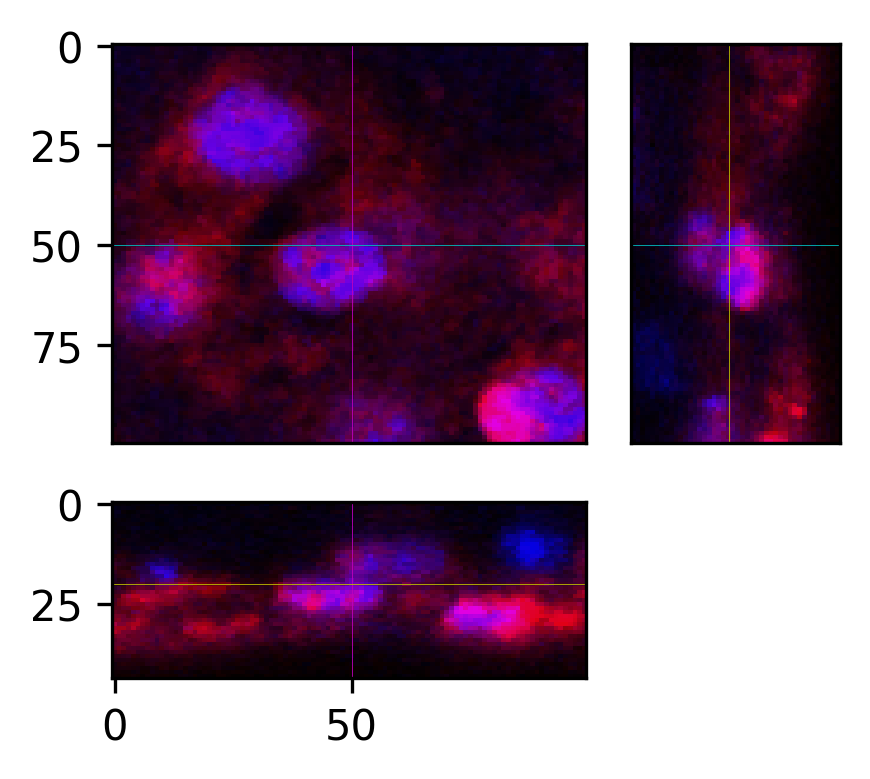

In [418]:
tiff_data_raw = tifffile.imread(curr_tif)
tiff_format = 'zcyx'

tiff_data = ski.filters.gaussian(tiff_data, sigma=[1,1,1],mode='reflect',truncate = 4,channel_axis=1)
tiff_data = med_filt_stack(tiff_data_raw,2)

tiff_data = norm_channels(tiff_data,'zcyx',clip=True)
tiff_data = tiff_data[:,[3,0,2],:,:]
print(tiff_data.shape)
tiff_data[:,1,:,:]=0

rgb_stack = tiff_data.transpose(0,2,3,1)*225
rgb_stack[rgb_stack<0]=0
rgb_stack[rgb_stack>255]=255
rgb_stack=rgb_stack.astype('uint8')

plot_point_data_rgb(400,600,20,rgb_stack,figsize=(3,2.7),rad=50)




In [410]:
rgb_stack.shape

(44, 800, 800, 3)

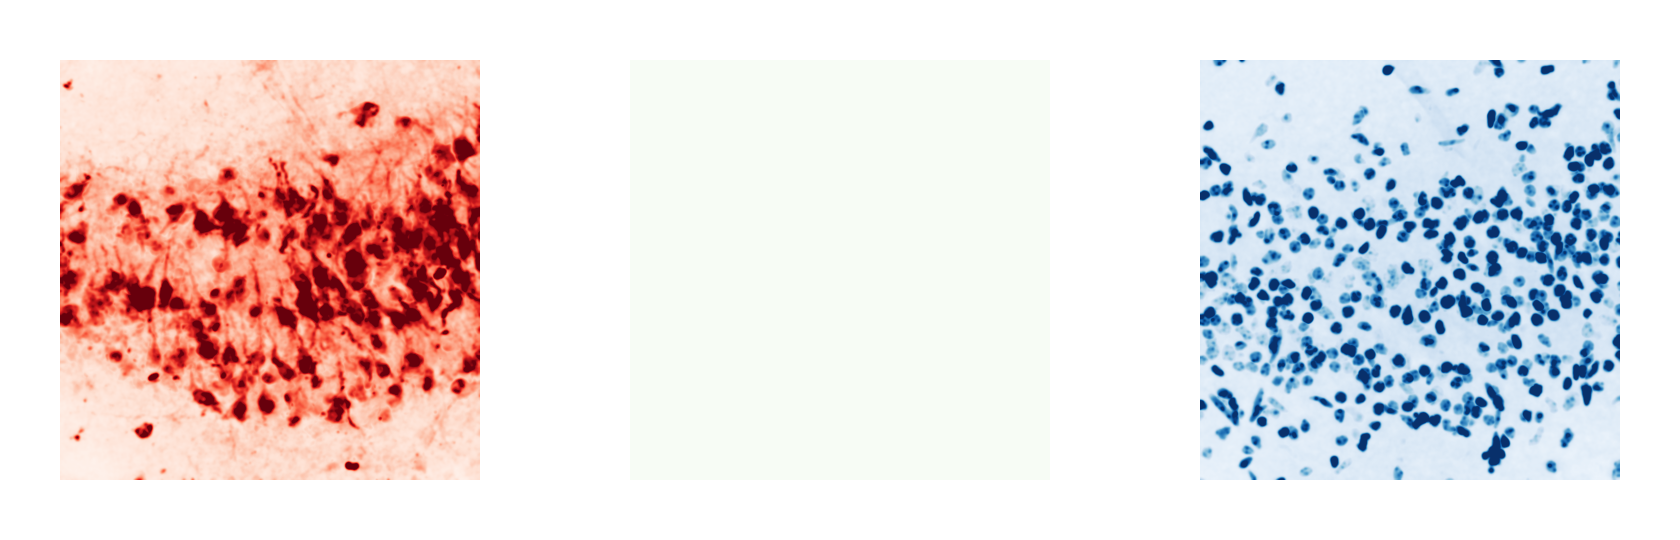

In [317]:
""" Display Split Projections """
num_c = tiff_data.shape[1]
fig,ax=plt.subplots(1,num_c,figsize=(num_c*1,1),dpi=600)
colors = ['Reds','Greens','Blues','gray']
for c in range(num_c):
    ax[c].imshow(np.max(tiff_data[:,c,:,:],axis=0), cmap=colors[c],vmin=0,vmax=1)
    ax[c].axis('off')
plt.tight_layout()

In [114]:
# colors = ['Reds','Greens','Blues','gray_r']
# for z in range(tiff_data.shape[0]):
#     num_c = tiff_data.shape[1]
#     fig,ax=plt.subplots(1,num_c,figsize=(num_c*1,1),dpi=300)
#     for c in range(num_c):
#         ax[c].imshow(tiff_data[z,c], cmap=colors[c],vmin=0,vmax=1)
#         ax[c].axis('off')
#     plt.tight_layout()
#     plt.show()

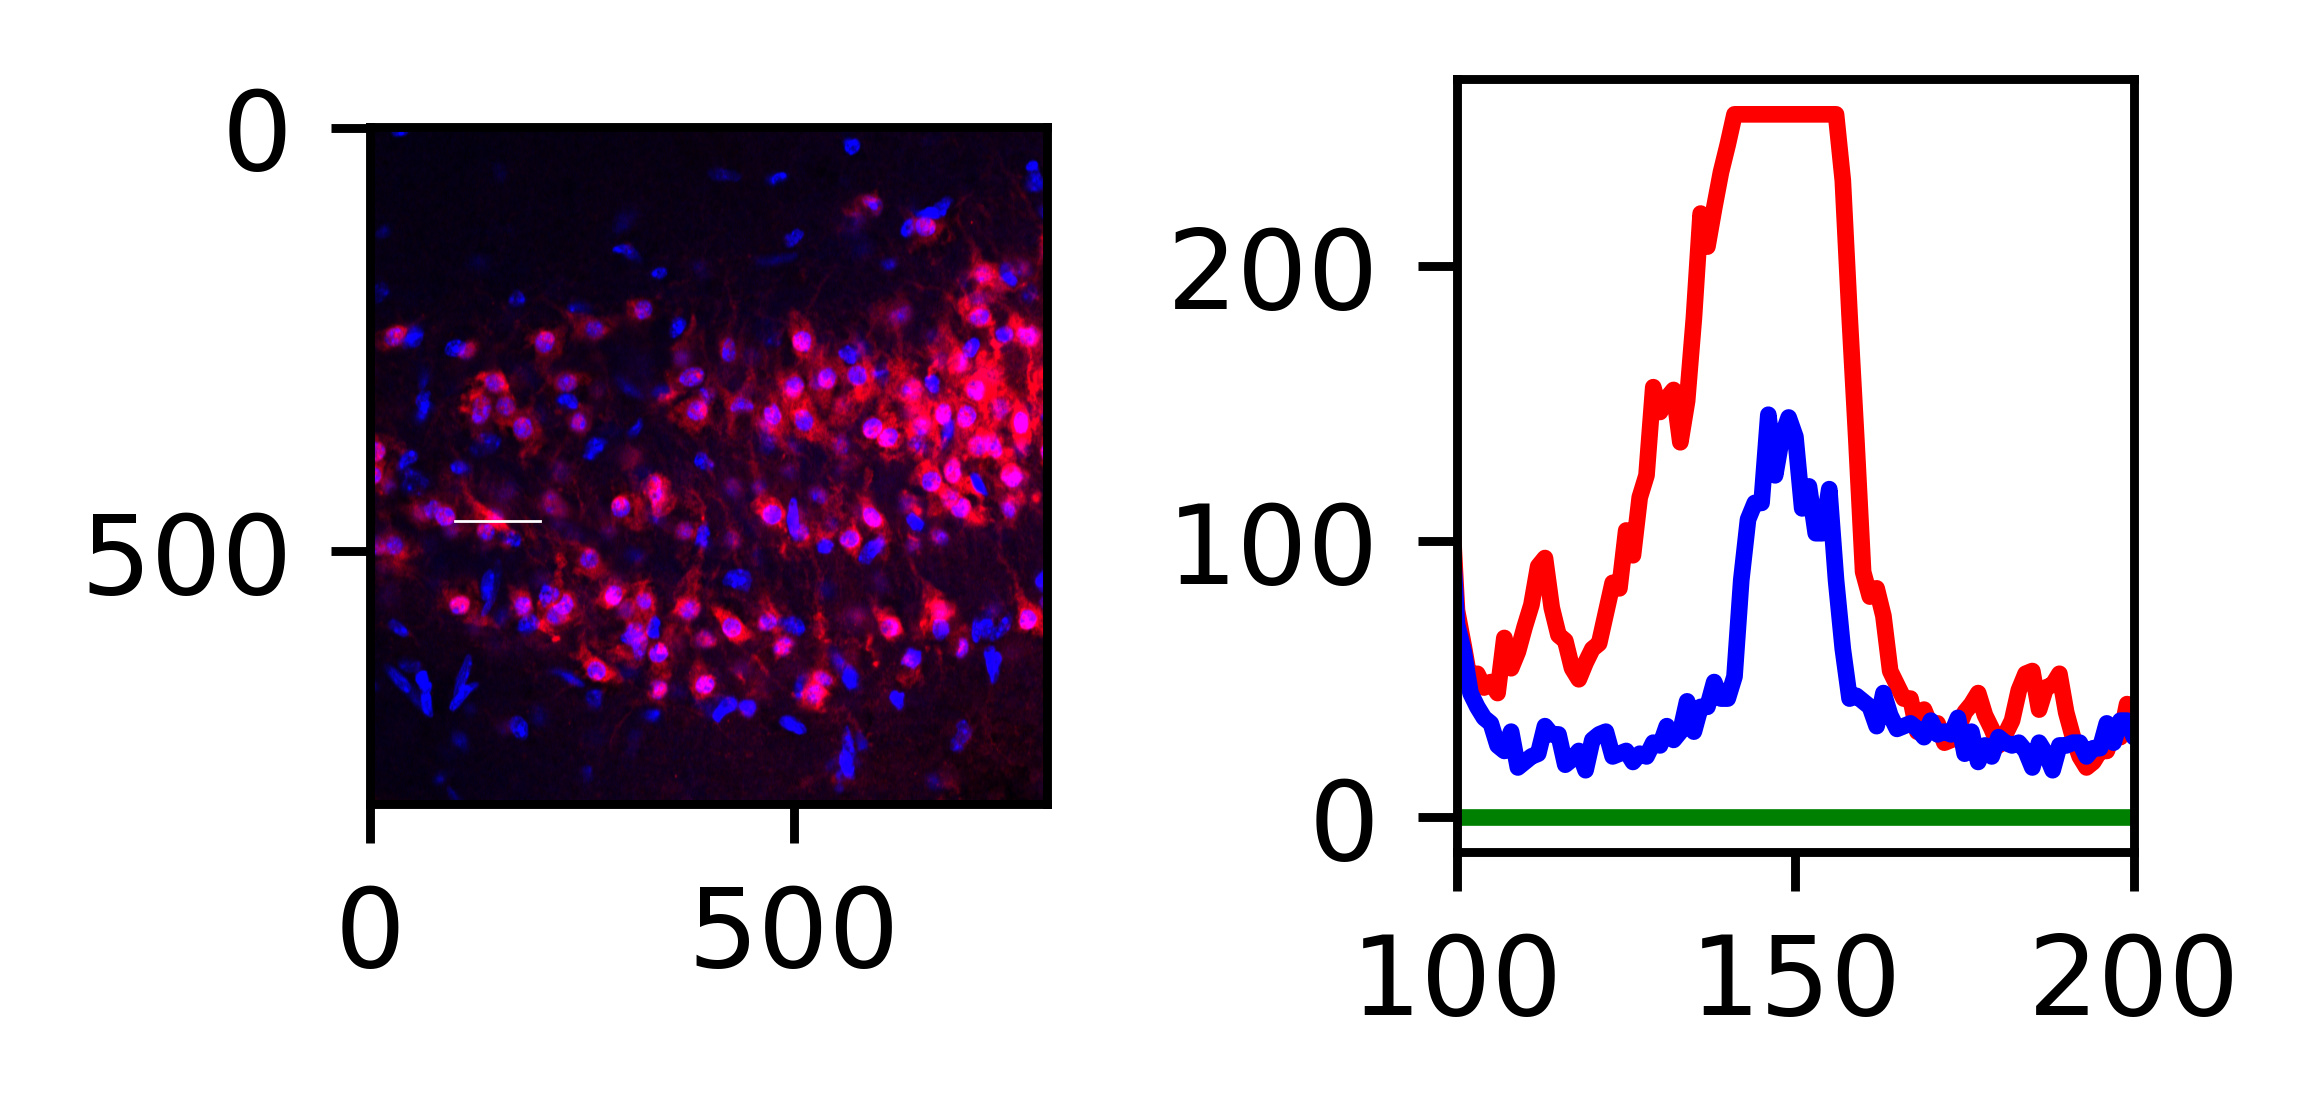

In [385]:
img_rgb = tiff_data.transpose([0,2,3,1])*255
img_rgb[img_rgb>255]=255
img_rgb[img_rgb<0]=0
img_rgb=img_rgb.astype('uint8')
fig,ax =plt.subplots(1,2,figsize=(3,1.5),dpi=800)
ax[0].imshow(img_rgb[27])
y=465
xb=[100,200]
ax[0].plot(xb,[y,y],'w',linewidth=.25)
ax[1].plot(img_rgb[27,y,:,0],color='r')
ax[1].plot(img_rgb[27,y,:,1],color='g')
ax[1].plot(img_rgb[27,y,:,2],color='b')
ax[1].set_xlim(xb)
plt.tight_layout()

(44, 3, 800, 800)
nuclear_channel 0
cell_channel 1


3D stack used, but stitch_threshold=0 and do_3D=False, so masks are made per plane only


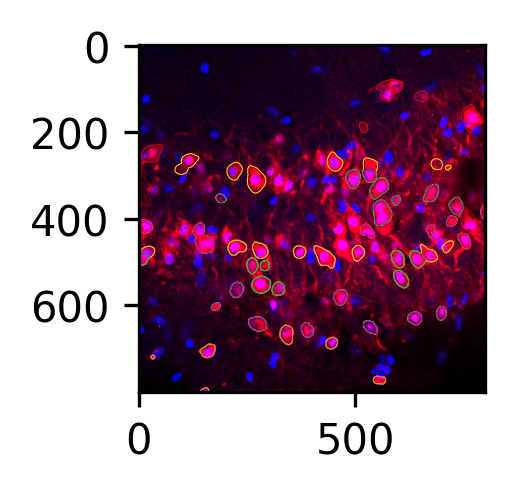

In [386]:
""" Define Model """
model = models.Cellpose(model_type='cyto3')


zi = 35
diam = 30
cell_channel = 1
nuclear_channel = 0
channel_axis = 3
print(tiff_data.shape)
print('nuclear_channel',nuclear_channel)
print('cell_channel',cell_channel)

img_rgb_zi = img_rgb[zi-1:zi+1,:,:,:]
img_rgb_zi.shape

(zi_masks, zi_flows, zi_styles, zi_diams) =  model.eval(img_rgb_zi, channels=[cell_channel, nuclear_channel], channel_axis = 3, diameter=diam, do_3D=False) #
fig,ax=plt.subplots(1,figsize=(1.5,1.5),dpi=300)
ax.imshow(img_rgb[zi,:,:,:])
ax.contour(zi_masks[0,:,:],linewidths=.2,cmap='prism')

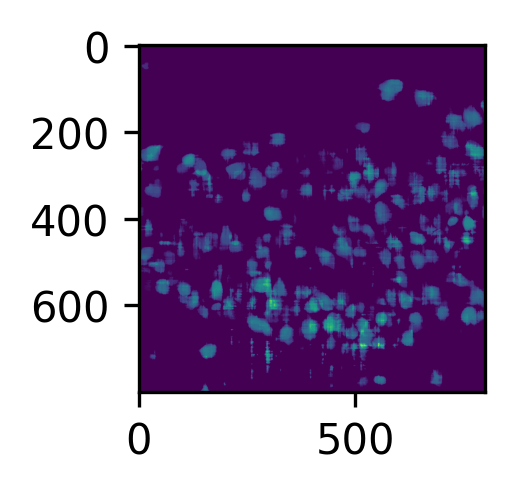

In [387]:
channel_axis=3
(masks, flows, styles, diams) =  model.eval(img_rgb, channels=[cell_channel, nuclear_channel], channel_axis = channel_axis, diameter=diam, do_3D=True) # ,stitch_threshold=0.02
fig,ax=plt.subplots(1,figsize=(1.5,1.5),dpi=300)
plt.imshow(np.sum(masks>0,axis=0))

In [388]:
def no_edges(masks):
    masks_og = masks.copy()
    planes = [masks[0,:,:],
              masks[-1,:,:],
              masks[:,0,:],
              masks[:,-1,:],
              masks[:,:,0],
              masks[:,:,-1]]

    for p in planes:
        del_ids = np.unique(p)
        for id in del_ids:
            masks[masks==id] = 0
    return masks, masks_og

masks,masks_og = no_edges(masks)

(<Figure size 900x810 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

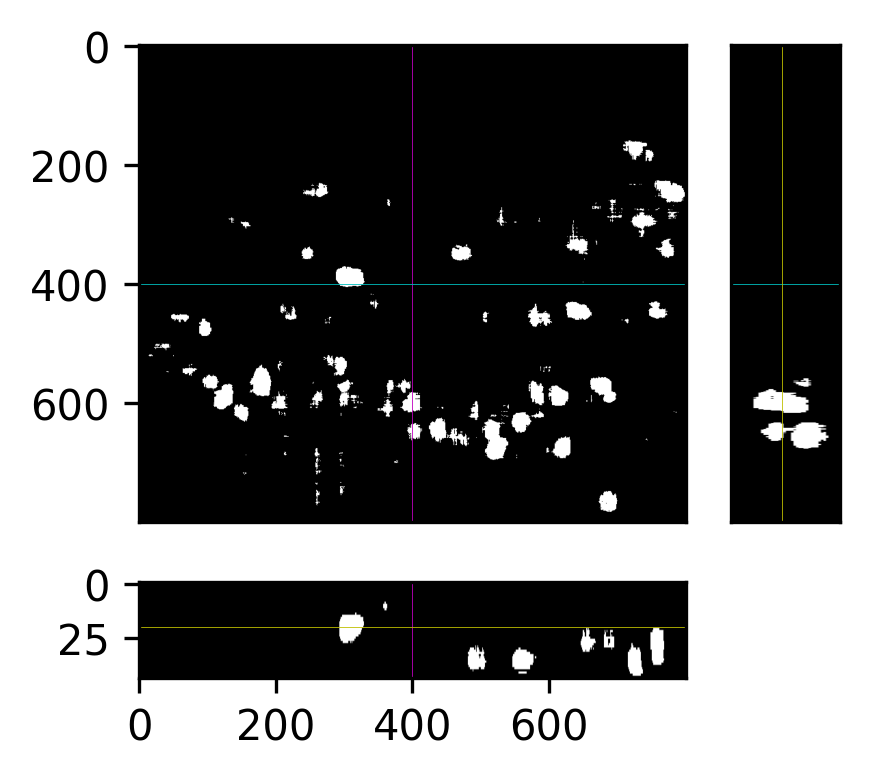

In [389]:
masks_3 = (np.stack([masks>0]*3,axis=-1)*255).astype('uint8')
plot_point_data_rgb(400,400,20,masks_3,figsize=(3,2.7))


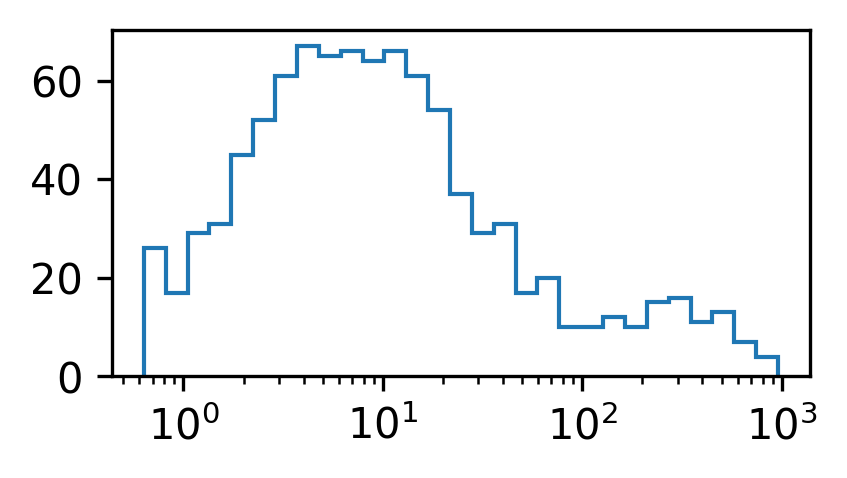

In [390]:

sizes,ids = np.histogram(masks.flatten(),bins=np.arange(0,np.max(masks))+1)
ids=ids[:-1]
ids = ids[sizes>0]
sizes=sizes[sizes>0]
voxel_size_um = [0.2652, 0.2652, 0.6]
sizes_um = sizes*np.prod(voxel_size_um)

fig,ax=plt.subplots(1,figsize=(3,1.5),dpi=300)
size_bins = np.logspace(np.log10(np.min(sizes_um)),np.log10(np.max(sizes_um)),num=30,base=10)
counts,size_bins = np.histogram(sizes_um,bins=size_bins)
ax.stairs(counts,size_bins)
ax.set_xscale('log')


0.0 2.0


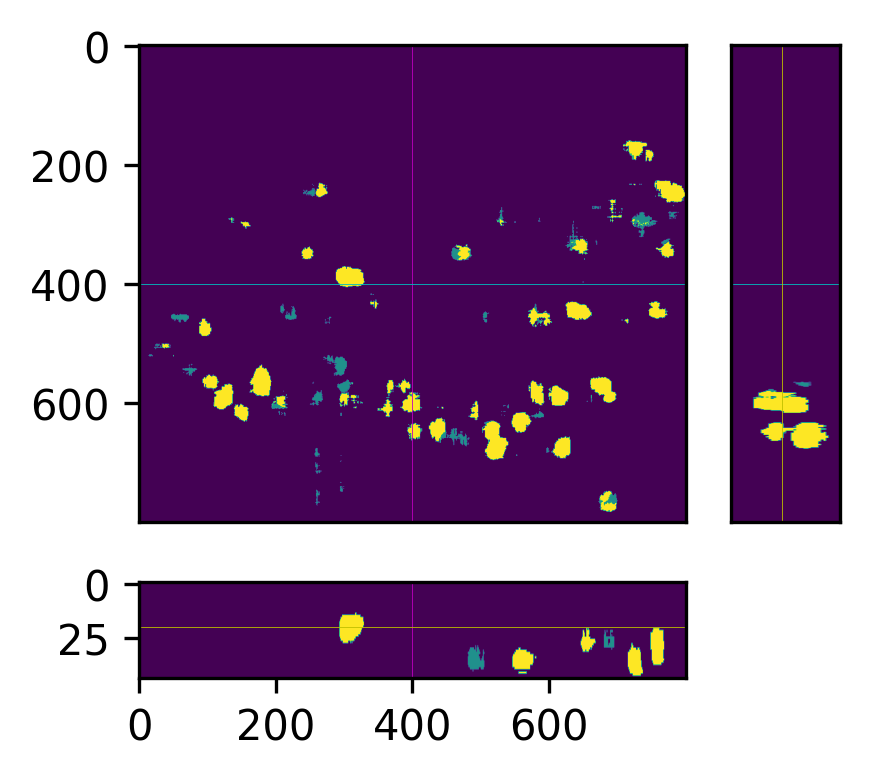

In [391]:
size_mask=masks.copy()
for i,s in zip(ids,sizes_um):
    size_mask[masks==i]=np.log10(s)

fi,ax,cbh = plot_point_data_pcol(400,400,20,size_mask,figsize=(3,2.7),cmap='hot')
tifffile.imwrite('./size_mask.tif',size_mask)

In [393]:
import scipy as sci
distance = sci.ndimage.distance_transform_edt(masks>0)
labels = ski.segmentation.watershed(distance)
plot_point_data_pcol(200,200,25,labels,figsize=(3,2.7))

0.0 1.0


(<Figure size 900x810 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object),
 <matplotlib.image.AxesImage at 0x16e9ad5ad20>)

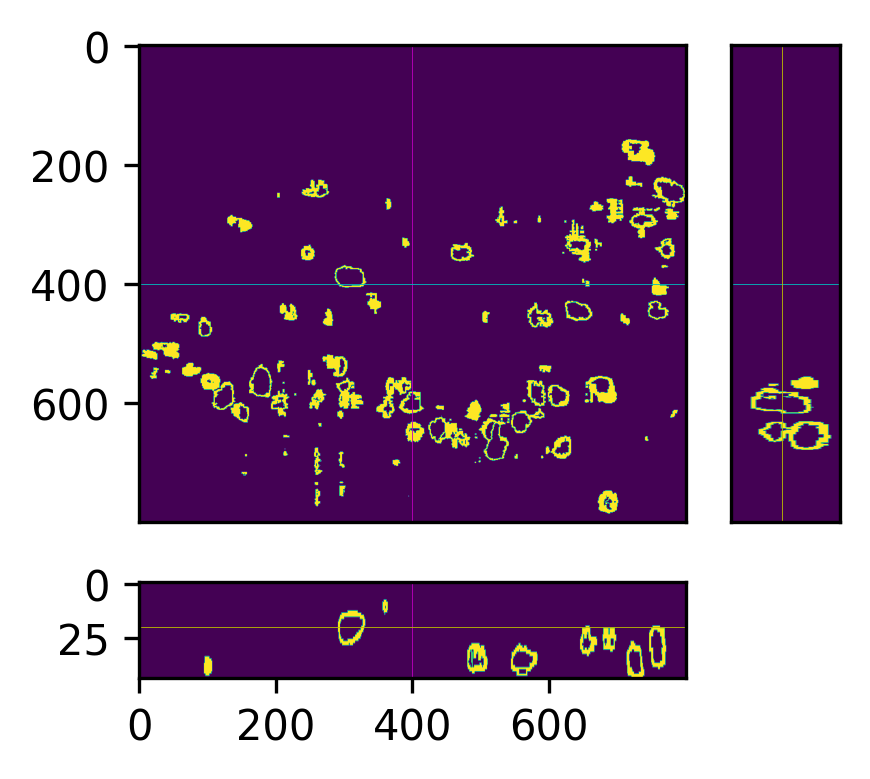

In [395]:
edges = ski.filters.sobel(masks)
is_border = (edges-np.mean(edges)) > np.std(edges)*.2
plot_point_data_pcol(400,400,20,is_border*1,figsize=(3,2.7))
# plt.hist(edges.flatten())

(<Figure size 900x810 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

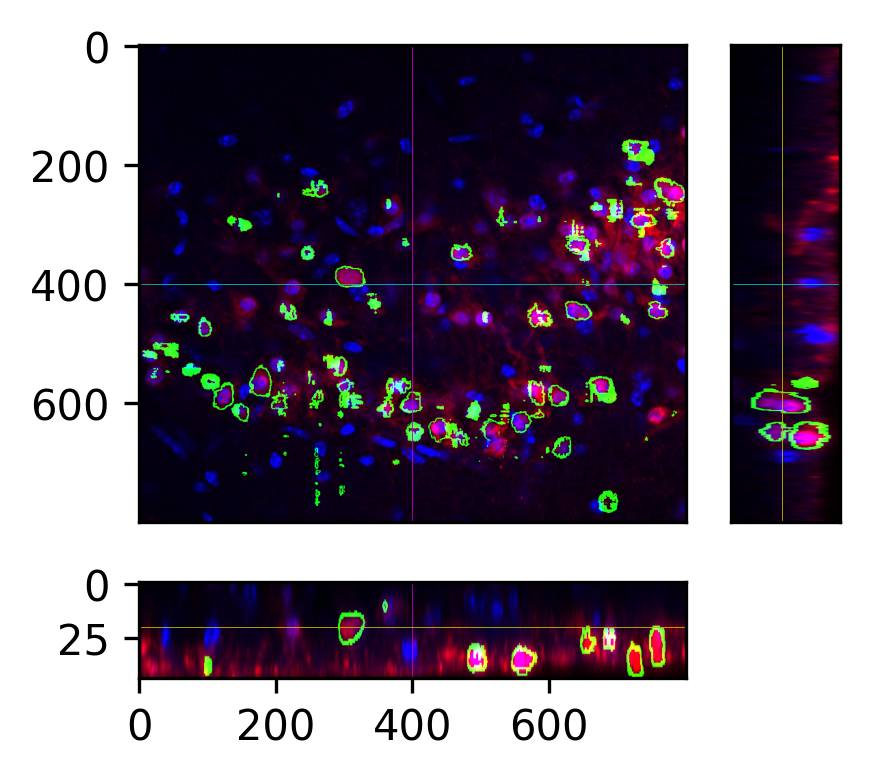

In [396]:

edges = ski.filters.sobel(masks)
is_border = (edges-np.mean(edges)) > np.std(edges)*.9

rgb_borders = img_rgb.copy()
rgb_borders[:,:,:,1] = is_border*255
plot_point_data_rgb(400,400,20,rgb_borders,figsize=(3,2.7))

(<Figure size 900x810 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

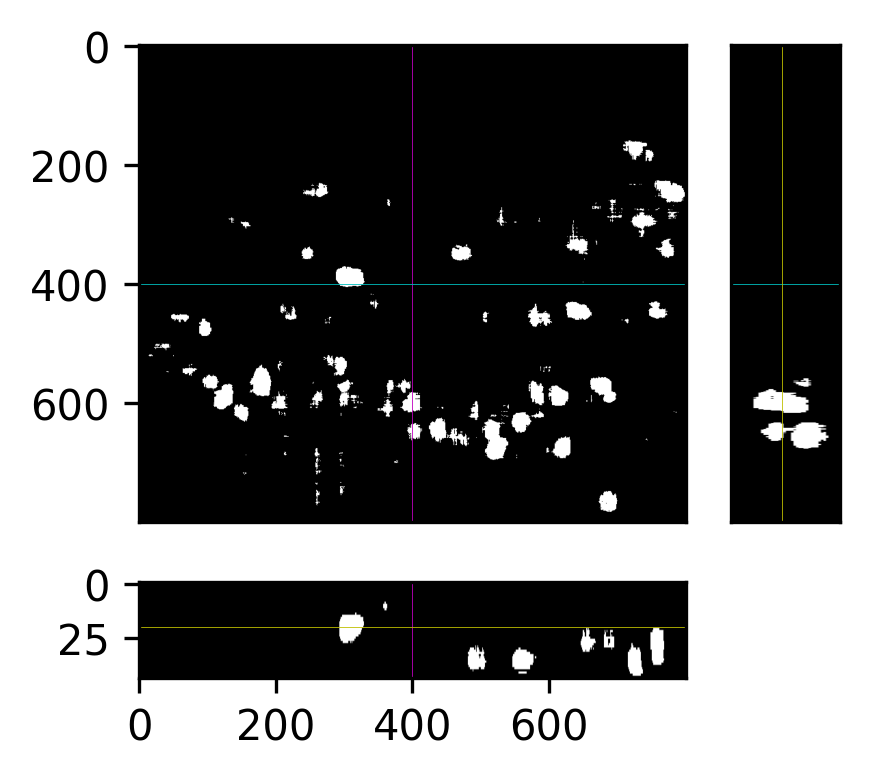

In [397]:
masks_3 = (np.stack([masks>0]*3,axis=-1)*255).astype('uint8')
plot_point_data_rgb(400,400,20,masks_3,figsize=(3,2.7))

In [ ]:
""" Slice 3d"""
zi = 35
fig,ax=plt.subplots(1,2,figsize=(3,1.5),dpi=800)
ax[0].imshow((tiff_data[zi,:,:,:].transpose(1,2,0)*255).astype('uint'))
ax[0].contour(masks[zi,:,:],linewidths=.2,cmap='gray')

""" no 3d"""
(zi_masks, zi_flows, zi_styles, zi_diams) =  model.eval(tiff_data[zi,:,:,:], channels=[cell_channel, nuclear_channel], channel_axis = 0, diameter=diam, do_3D=True) #
ax[1].imshow(img_rgb[zi,:,:,:])
ax[1].contour(zi_masks,linewidths=.2,cmap='gray')


In [ ]:
mask_shuffle=np.zeros_like(masks)
ids = np.arange(np.max(masks))+1
rand_ids = np.random.choice(ids, size=len(ids), replace=False)
for i,ri in enumerate(rand_ids):
    mask_shuffle[masks==i+1] = ri
tifffile.imwrite('./mask_shuffle.tif',mask_shuffle)

In [ ]:
edge_mask = np.ones_like(mask_shuffle,dtype='float')
for zi in tqdm(range(mask_shuffle.shape[0])):
    edge_mask[zi,:,:] = skimage.filters.sobel(mask_shuffle[zi,:,:])
edge_mask[edge_mask==0]=np.nan

In [ ]:
for zi in range(masks.shape[0]):
    fig,ax=plt.subplots(1,figsize=(2,2),dpi=300)
    ax.imshow(img_rgb[zi,:,:,:])
    ax.contour(masks[zi,:,:],linewidths=.2)

In [ ]:
vmax=np.nanmax(masks)
levels = np.arange(vmax+1).astype(int)
print(levels)

In [ ]:
# masks=masks.astype(float)
# masks[masks<1]=np.nan

top = np.nanmax(masks)
masks.shape
num_z = tiff_data.shape[0]
for z in range(num_z):
    fig,ax=plt.subplots(1,2,figsize=(6,2),dpi=300)
    ax[0].imshow(tiff_data[z,cell_channel-1,:,:], cmap='Reds',vmin=0,vmax=1)
    ax[1].imshow(tiff_data[z,nuclear_channel-1,:,:], cmap='Blues',vmin=0,vmax=1)
    # ax[2].imshow(img_rgb[z,:,:])
    # ax[0].contour(masks[z,:,:],linewidths=.2,vmin=0,vmax=vmax,cmap='prism',levels=levels)
    ax[1].contour(masks[z,:,:],linewidths=.2,vmin=0,vmax=vmax,cmap='prism',levels=levels)
    ax[2].contour(masks[z,:,:],linewidths=.2,vmin=0,vmax=vmax,cmap='prism',levels=levels)
    plt.tight_layout


In [ ]:
# tiff_data_list = [tiff_data[z,:,:,:] for z in range(tiff_data.shape[0])]

3.2377218505136174

In [ ]:
voxels = [0.2652, 0.2652, 0.6]

In [ ]:
non_zero = masks[~np.isnan(masks)]
num_cells = np.max(non_zero).astype(int)
print(num_cells)
edges = np.arange(0,num_cells)
pxl_counts, ids = np.histogram(masks[~np.isnan(masks)],bins = edges)

size_counts, sizes = np.histogram(np.log10(pxl_counts+1),bins=200)

fig,ax = plt.subplots(1,1,figsize=(2,1),dpi=300)
ax.stairs(size_counts,sizes) #np.cumsum(size_counts)
ax.set_yscale('log')